In [ ]:
# analyzing HPC amyloid, microglia after RLP treatment (blind)

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import wesanderson
import os
import re
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [38]:
def get_tiny_df(file_path, cols, iid_channel=None):
    """
    Returns a df with one row, corresponding to the amyloid/microglia/astrocyte
    data for a single image.
    """
    
    df = pd.read_csv(file_path, header=2, index_col=0)
    idx = re.search(r'\d+_?[MF]_?sliceB(\d+)', file_path).group(0)
    gender = 'M' if '_M_' in idx else 'F'

    if iid_channel is None:
        # just get the volume
        vol = df.loc['Volume']['Sum']
        area = df.loc['Area']['Sum']
        vals = [idx, gender, vol, area]
        
    else:
        # get surface, iid data
        num_cells = df.loc['Number of Disconnected Components']['Count']
        vol = df.loc['Volume']['Sum']
        sa = df.loc['Area']['Sum']
    
        df = df[df['Channel'] == iid_channel]
        mean_iid = df.loc['Intensity Sum']['Mean']
        sum_iid = df.loc['Intensity Sum']['Sum']

        vals = [idx, gender, num_cells, vol, sa, sum_iid]

    return pd.DataFrame([vals], columns=cols)


def get_big_df(direc, cols, iid_channel=None):
    """
    Returns a df with the amyloid/microglia/astrocyte data for all images in
    a directory.
    """
    
    files = [os.path.join(direc, f) for f in os.listdir(direc)]
    dfs = [get_tiny_df(file_path, cols, iid_channel) for file_path in files]
    
    return pd.concat(dfs, ignore_index=True)


def join_dfs(dfs, sofar=None):
    """
    Inner joins a list of dfs on 'ID' and 'Gender'.
    """

    if sofar is None:
        sofar = dfs[0]
        dfs = dfs[1:]

    if len(dfs) == 0:
        return sofar

    else:
        merged_df = pd.merge(sofar, dfs[0], on=['ID', 'Gender'], how='inner')
        return join_dfs(dfs[1:], merged_df)

In [33]:
# all 1-16 data (OLD)

hpc_amyloid_dir = '../data/Panel B Data/hpc amyloid 1-16 OLD'
a_cols = ['ID', 'Gender', 'Amyloid Plaque Count', 'Amyloid Surface Volume', 'Amyloid Surface Area', 'Total Amyloid IID'] 
a_df = get_big_df(hpc_amyloid_dir, a_cols, 4)

hpc_microglia_dir = '../data/Panel B Data/hpc microglia 1-16 OLD'
m_cols = ['ID', 'Gender', 'Microglia Count', 'Microglia Surface Volume', 'Microglia Surface Area', 'Total Microglia IID']
m_df = get_big_df(hpc_microglia_dir, m_cols, 3)

hpc_vol_dir = '../data/Panel B Data/hpc volume 1-16 OLD'
vol_cols = ['ID', 'Gender', 'HPC Volume', 'HPC Area']
vol_df = get_big_df(hpc_vol_dir, vol_cols)

hpc_1_16_df_old = join_dfs([a_df, m_df, vol_df])
hpc_1_16_df_old

,ID,Gender,Amyloid Plaque Count,Amyloid Surface Volume,Amyloid Surface Area,Total Amyloid IID,Microglia Count,Microglia Surface Volume,Microglia Surface Area,Total Microglia IID,HPC Volume,HPC Area
0,10_F_sliceB1,F,307,4492854.00,907424.125,1.850235e+09,1213,2939893.75,1142461.625,1.767167e+09,265454192.0,5519162.5
1,10_F_sliceB2,F,373,4596036.50,1013653.312,2.016756e+09,1423,3220686.75,1275260.500,2.050003e+09,303225920.0,6249005.0
2,11_M_sliceB1,M,283,4038626.25,837068.125,1.661292e+09,1138,2791476.00,1063136.125,1.364042e+09,230833328.0,5270785.5
3,11_M_sliceB2,M,273,4418372.50,877899.188,2.354573e+09,1218,2629473.75,1050315.000,1.444371e+09,236748832.0,5407473.0
4,13_M_sliceB1,M,271,4159571.00,824651.625,2.617257e+09,1070,2415897.25,946939.500,1.529862e+09,253646080.0,6024934.0
5,13_M_sliceB2,M,278,4060038.25,839550.250,2.060893e+09,1056,2458955.00,969522.812,1.457911e+09,218336032.0,5219319.5
6,14_M_sliceB1,M,388,4761958.50,1094021.750,2.396406e+09,1683,4145804.00,1650236.500,2.759656e+09,407611744.0,7625030.0
7,14_M_sliceB2,M,376,4331078.00,1040503.375,1.861698e+09,1722,3814456.00,1545798.875,2.351618e+09,388364512.0,7293376.5
8,15_F_sliceB1,F,322,5648089.50,1068879.500,6.008068e+09,1134,3439208.25,1229256.875,3.518911e+09,270843648.0,6125738.0
9,15_F_sliceB2,F,337,5379447.00,1058308.250,5.631208e+09,1205,3412168.25,1239937.750,3.661322e+09,283019840.0,6393100.5


In [39]:
# all 1-16 data (NEW)

hpc_amyloid_dir = '../data/Panel B Data/hpc amyloid 1-16 NEW'
a_cols = ['ID', 'Gender', 'Amyloid Plaque Count', 'Amyloid Surface Volume', 'Amyloid Surface Area', 'Total Amyloid IID'] 
a_df = get_big_df(hpc_amyloid_dir, a_cols, 4)

hpc_microglia_dir = '../data/Panel B Data/hpc microglia 1-16 NEW'
m_cols = ['ID', 'Gender', 'Microglia Count', 'Microglia Surface Volume', 'Microglia Surface Area', 'Total Microglia IID']
m_df = get_big_df(hpc_microglia_dir, m_cols, 3)

hpc_vol_dir = '../data/Panel B Data/hpc volume 1-16 NEW'
vol_cols = ['ID', 'Gender', 'HPC Volume', 'HPC Area']
vol_df = get_big_df(hpc_vol_dir, vol_cols)

hpc_1_16_df_new = join_dfs([a_df, m_df, vol_df])
hpc_1_16_df_new

,ID,Gender,Amyloid Plaque Count,Amyloid Surface Volume,Amyloid Surface Area,Total Amyloid IID,Microglia Count,Microglia Surface Volume,Microglia Surface Area,Total Microglia IID,HPC Volume,HPC Area
0,10_F_sliceB1,F,423,4649884.50,992918.375,1.852975e+09,1152,2977587.50,1136893.875,1.703570e+09,255710960.0,5323315.5
1,10_F_sliceB2,F,447,4715429.00,1056233.500,2.026674e+09,1343,2908001.25,1156190.625,1.796021e+09,282787520.0,5838405.0
2,11_M_sliceB1,M,333,3786033.75,800650.562,1.532067e+09,1130,2477523.25,987829.812,1.144545e+09,215076928.0,4921951.0
3,11_M_sliceB2,M,338,4276339.00,885493.375,2.187599e+09,1185,2377300.50,989329.062,1.229623e+09,222075584.0,5075967.5
4,13_M_sliceB1,M,342,4187583.75,852253.500,2.524619e+09,1081,2399334.00,940317.625,1.457002e+09,240419856.0,5732657.0
5,13_M_sliceB2,M,348,3898776.25,837681.625,1.997962e+09,1044,2246017.75,912995.812,1.313742e+09,214950176.0,5138887.5
6,14_M_sliceB1,M,528,4508691.00,1090433.000,2.131241e+09,1635,3612151.75,1464437.500,2.260744e+09,383261152.0,7189401.5
7,14_M_sliceB2,M,543,4336181.00,1104051.875,1.643241e+09,1712,3657816.25,1487433.500,2.117666e+09,364223168.0,6867965.0
8,15_F_sliceB1,F,340,5548127.50,1029561.875,5.572477e+09,1184,3092826.50,1153124.750,2.968284e+09,249808544.0,5684165.0
9,15_F_sliceB2,F,358,5187655.00,999842.000,5.160028e+09,1214,3234940.25,1216140.500,3.119881e+09,245267744.0,5597833.0


In [53]:
# all 18-32 data

hpc_amyloid_dir = '../data/Panel B Data/hpc amyloid 18-32'
a_cols = ['ID', 'Gender', 'Amyloid Plaque Count', 'Amyloid Surface Volume', 'Amyloid Surface Area', 'Total Amyloid IID'] 
a_df = get_big_df(hpc_amyloid_dir, a_cols, 5)

hpc_microglia_dir = '../data/Panel B Data/hpc microglia 18-32'
m_cols = ['ID', 'Gender', 'Microglia Count', 'Microglia Surface Volume', 'Microglia Surface Area', 'Total Microglia IID']
m_df = get_big_df(hpc_microglia_dir, m_cols, 6)

hpc_vol_dir = '../data/Panel B Data/hpc volume 18-32'
vol_cols = ['ID', 'Gender', 'HPC Volume', 'HPC Area']
vol_df = get_big_df(hpc_vol_dir, vol_cols)

hpc_18_32_df = join_dfs([a_df, m_df, vol_df])
hpc_18_32_df

,ID,Gender,Amyloid Plaque Count,Amyloid Surface Volume,Amyloid Surface Area,Total Amyloid IID,Microglia Count,Microglia Surface Volume,Microglia Surface Area,Total Microglia IID,HPC Volume,HPC Area
0,18_M_sliceB1,M,252,1070255.125,312287.500,1.780110e+09,786,723302.562,378974.344,1.173205e+09,225545824.0,5221875.5
1,18_M_sliceB2,M,200,1092296.625,282036.500,2.360411e+09,1543,3712581.500,1537870.500,5.317661e+09,185318896.0,5344327.5
2,19_M_sliceB1,M,203,759266.875,244090.516,1.006048e+09,1540,3984291.750,1635789.375,3.389033e+09,163113552.0,4721979.5
3,19_M_sliceB2,M,183,714234.750,230927.484,9.649140e+08,1660,4080507.250,1705247.000,3.523638e+09,164929904.0,4774357.0
4,20_F_sliceB1,F,321,2047772.625,512399.781,3.882771e+09,1516,3667229.750,1505405.250,3.425074e+09,189788176.0,5226448.5
5,20_F_sliceB2,F,283,1792286.375,493274.250,3.350049e+09,1537,3774917.250,1568181.750,3.756741e+09,179518560.0,5173741.0
6,21_F_sliceB1,F,158,473905.500,168091.891,4.330456e+08,2206,2209417.750,1107071.750,1.239544e+09,182197680.0,5264432.5
7,21_F_sliceB2,F,175,496111.062,173695.016,3.738897e+08,2747,3084471.500,1551890.000,1.728811e+09,170077040.0,5166163.0
8,22_F_sliceB1,F,204,783335.188,230796.531,1.281378e+09,1531,3630556.750,1529825.375,3.812652e+09,179684640.0,5187650.5
9,22_F_sliceB2,F,197,660279.875,223889.859,8.180616e+08,1508,3536187.250,1494138.750,3.068301e+09,175877648.0,5074633.0


In [54]:
# all 33-40 data

hpc_amyloid_dir = '../data/Panel B Data/hpc amyloid 33-40'
a_cols = ['ID', 'Gender', 'Amyloid Plaque Count', 'Amyloid Surface Volume', 'Amyloid Surface Area', 'Total Amyloid IID'] 
a_df = get_big_df(hpc_amyloid_dir, a_cols, 5)

hpc_microglia_dir = '../data/Panel B Data/hpc microglia 33-40'
m_cols = ['ID', 'Gender', 'Microglia Count', 'Microglia Surface Volume', 'Microglia Surface Area', 'Total Microglia IID']
m_df = get_big_df(hpc_microglia_dir, m_cols, 4)

hpc_vol_dir = '../data/Panel B Data/hpc volume 33-40'
vol_cols = ['ID', 'Gender', 'HPC Volume', 'HPC Area']
vol_df = get_big_df(hpc_vol_dir, vol_cols)

hpc_33_40_df = join_dfs([a_df, m_df, vol_df])
hpc_33_40_df

,ID,Gender,Amyloid Plaque Count,Amyloid Surface Volume,Amyloid Surface Area,Total Amyloid IID,Microglia Count,Microglia Surface Volume,Microglia Surface Area,Total Microglia IID,HPC Volume,HPC Area
0,33_M_sliceB1,M,426,3565922.75,957618.438,5.157322e+09,1645,10342572.0,2967899.75,6.630834e+09,351719520.0,6219984.0
1,33_M_sliceB2,M,406,4150843.75,1053384.500,6.165723e+09,1970,14177917.0,4028603.50,9.070294e+09,368723552.0,6512551.5
2,36_M_sliceB1,M,415,2203436.50,716912.000,1.750334e+09,1776,12504867.0,3470398.25,7.933297e+09,294133664.0,5640106.5
3,36_M_sliceB2,M,310,2129103.25,620043.125,1.864942e+09,1717,12144345.0,3358918.00,7.391889e+09,290507552.0,5599237.5
4,37_F_sliceB1,F,360,2372099.25,698655.500,2.023887e+09,1650,9437748.0,2731296.00,4.773255e+09,298440192.0,6072388.0
5,37_F_sliceB2,F,290,2145227.50,589816.062,1.659100e+09,1279,7707887.0,2220508.25,3.824490e+09,229891376.0,5201055.0
6,40_F_sliceB1,F,343,2411332.75,673542.625,2.714532e+09,1411,7892545.5,2323528.75,4.674134e+09,255775824.0,6329348.5
7,40_F_sliceB2,F,364,3038707.75,784357.375,3.863780e+09,1351,7576337.5,2222621.00,4.928656e+09,261865696.0,6601547.0


In [60]:
hpc_df = pd.concat([hpc_1_16_df_new, hpc_18_32_df, hpc_33_40_df], ignore_index=True)
hpc_df

,ID,Gender,Amyloid Plaque Count,Amyloid Surface Volume,Amyloid Surface Area,Total Amyloid IID,Microglia Count,Microglia Surface Volume,Microglia Surface Area,Total Microglia IID,HPC Volume,HPC Area
0,10_F_sliceB1,F,423,4649884.50,992918.375,1.852975e+09,1152,2977587.50,1136893.875,1.703570e+09,255710960.0,5323315.5
1,10_F_sliceB2,F,447,4715429.00,1056233.500,2.026674e+09,1343,2908001.25,1156190.625,1.796021e+09,282787520.0,5838405.0
2,11_M_sliceB1,M,333,3786033.75,800650.562,1.532067e+09,1130,2477523.25,987829.812,1.144545e+09,215076928.0,4921951.0
3,11_M_sliceB2,M,338,4276339.00,885493.375,2.187599e+09,1185,2377300.50,989329.062,1.229623e+09,222075584.0,5075967.5
4,13_M_sliceB1,M,342,4187583.75,852253.500,2.524619e+09,1081,2399334.00,940317.625,1.457002e+09,240419856.0,5732657.0
...,...,...,...,...,...,...,...,...,...,...,...,...
62,36_M_sliceB2,M,310,2129103.25,620043.125,1.864942e+09,1717,12144345.00,3358918.000,7.391889e+09,290507552.0,5599237.5
63,37_F_sliceB1,F,360,2372099.25,698655.500,2.023887e+09,1650,9437748.00,2731296.000,4.773255e+09,298440192.0,6072388.0
64,37_F_sliceB2,F,290,2145227.50,589816.062,1.659100e+09,1279,7707887.00,2220508.250,3.824490e+09,229891376.0,5201055.0
65,40_F_sliceB1,F,343,2411332.75,673542.625,2.714532e+09,1411,7892545.50,2323528.750,4.674134e+09,255775824.0,6329348.5


In [40]:
np.mean(hpc_1_16_df_old['HPC Area'])

6576719.142857143

In [41]:
np.mean(hpc_1_16_df_new['HPC Area'])

5879602.25862069

In [21]:
np.mean(hpc_18_32_df['HPC Area'])

5128452.516666667

In [55]:
np.mean(hpc_33_40_df['HPC Area'])

6022027.25

In [51]:
#hpc_df.to_csv('HPC.csv')

<Axes: xlabel='Amyloid Plaque Count', ylabel='Count'>

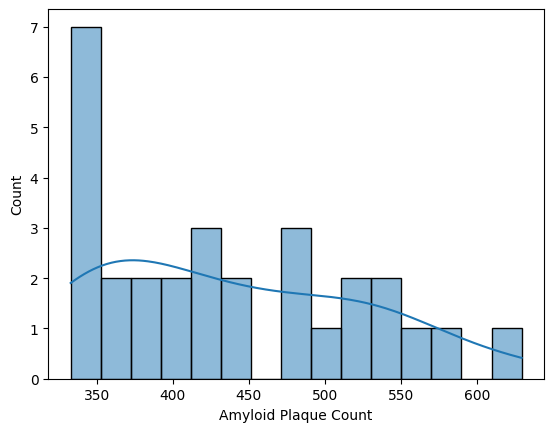

In [50]:
sns.histplot(data=hpc_1_16_df_new, x='Amyloid Plaque Count', bins=15, kde=True)

<Axes: xlabel='Amyloid Plaque Count', ylabel='Count'>

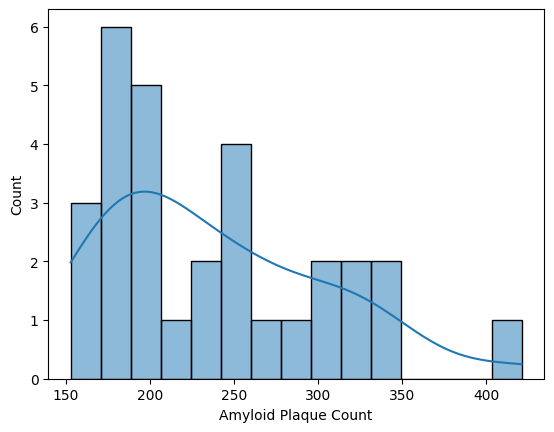

In [48]:
sns.histplot(data=hpc_18_32_df, x='Amyloid Plaque Count', bins=15, kde=True)

<Axes: xlabel='Amyloid Plaque Count', ylabel='Count'>

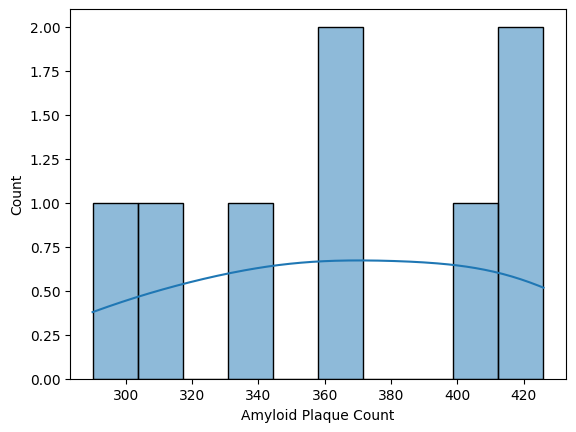

In [57]:
sns.histplot(data=hpc_33_40_df, x='Amyloid Plaque Count', bins=10, kde=True)

<Axes: xlabel='Amyloid Plaque Count', ylabel='Count'>

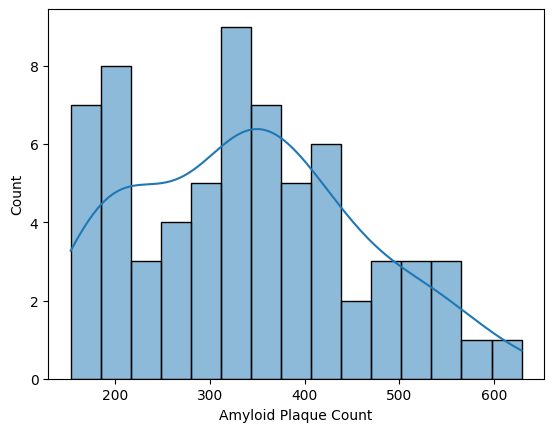

In [63]:
# there are definitely artifacts in here from analysis. establish common min. plaque size, then revisit this
sns.histplot(data=hpc_df, x='Amyloid Plaque Count', bins=15, kde=True)

<Axes: xlabel='Total Amyloid IID', ylabel='Count'>

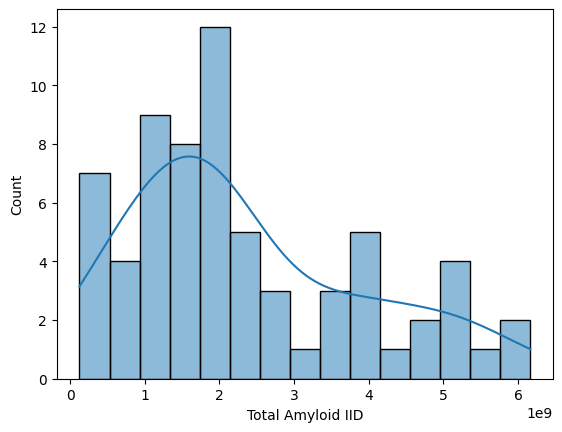

In [61]:
sns.histplot(data=hpc_df, x='Total Amyloid IID', bins=15, kde=True)

<Axes: xlabel='Microglia Count', ylabel='Count'>

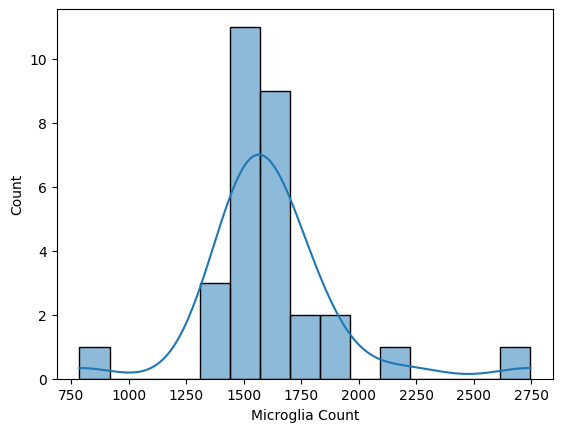

In [99]:
sns.histplot(data=hpc_df, x='Microglia Count', bins=15, kde=True)

<Axes: xlabel='Total Microglia IID', ylabel='Count'>

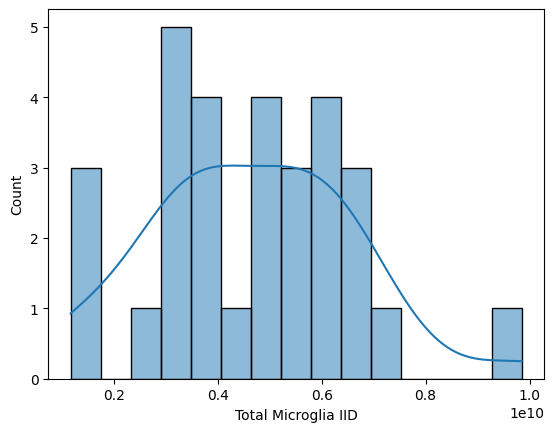

In [100]:
sns.histplot(data=hpc_df, x='Total Microglia IID', bins=15, kde=True)